### The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:
● Understand the basic Image Classification pipeline and the data-driven approach
(train/predict stages)
● Data fetching and understand the train/test splits. (5 points)
● Implement and apply a deep neural network classifier (including feedforward neural
network, RELU, activations) (10 points)
● Implement batch normalization for training the neural network (5 points)
● Print the classification accuracy metrics [ Print Both Classification report and Confusion
Matrix ] (10 points)

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import RMSprop, Adam, Adadelta
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.activations import relu
from sklearn import metrics
import matplotlib.pyplot as plt

import h5py
import numpy as np

In [2]:
#Opening the SVHN file in read mode
h5f = h5py.File('SVHN_single_grey1.h5','r')
# getting the list of keys
LS = list(h5f.keys())
print('List of datasets in the file: \n', LS)

List of datasets in the file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [3]:
#Gettting the train and test splits
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
#Closing the file
h5f.close()

In [4]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [5]:
num_classes = 10

X_train = X_train.reshape(42000, 1024)    # 1024 = 32 X 32 the size of each image. There are 42000 images for training
X_test = X_test.reshape(18000, 1024)      # Images are flattended out into a vector of 1024 elements

In [6]:
X_train = X_train.astype('float32')      # Changing the data type to float from integer (0 - 255)
X_test = X_test.astype('float32')

In [7]:
X_train /= 255                           # Scaling the data between 0 and 1
X_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)  # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, 10) # Keras converst these into 1-hot coded vectors as these are lables

# Instantiating the model

In [9]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(1024,)))   #First hidden layer of 784  neurons, each neuron takes input 
                                                               # vector of size 784



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense (None, 1024) ==> (None, 784)
dense_1 (None, 784) ==> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               803600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 811,450
Trainable params: 811,450
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.8081667


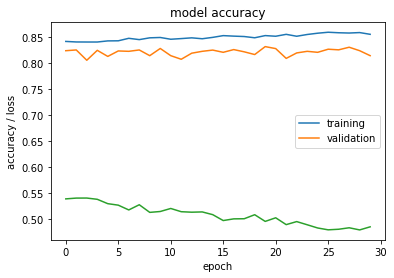

In [12]:
batch_size = 256
epochs = 30

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.8233333, 0.8247619, 0.805, 0.8240476, 0.81238097, 0.82285714, 0.82214284, 0.8247619, 0.8138095, 0.8276191, 0.8138095, 0.80690473, 0.81857145, 0.82214284, 0.8245238, 0.8202381, 0.82547617, 0.8211905, 0.81595236, 0.83119047, 0.82738096, 0.80857146, 0.81904763, 0.82214284, 0.8202381, 0.8261905, 0.825, 0.83, 0.8233333, 0.8138095]
[0.8411376, 0.84010583, 0.84, 0.84, 0.8421429, 0.8423281, 0.8471164, 0.8446032, 0.8480423, 0.8487037, 0.8453175, 0.8465873, 0.84801584, 0.84626985, 0.84891534, 0.85227513, 0.8512963, 0.8505291, 0.84814817, 0.85232806, 0.85108465, 0.85473543, 0.8510582, 0.85444444, 0.85690475, 0.8587566, 0.8577778, 0.85724866, 0.8581217, 0.85478836]


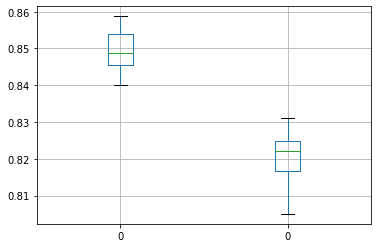

In [14]:
import pandas as pd

print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

##### Simple 1 hidden layer neural network got an accuracy of 80%
##### But training and validation scores are in different ranges ... looks like overfitting case
##### The accuracy is reached quite early in the epochs within first 5

# Number of hidden layers

In [17]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(1024,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=batch_size, epochs=epochs):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
 
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               803600    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 1,426,890
Trainable params: 1,426,890
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8177222


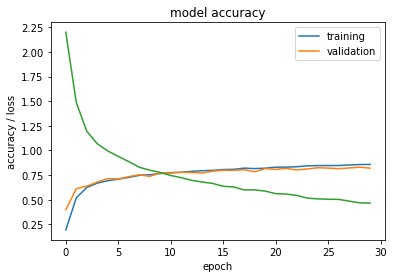

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               803600    
_________________________________________________________________
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                7850      
Total params: 2,042,330
Trainable params: 2,042,330
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8345


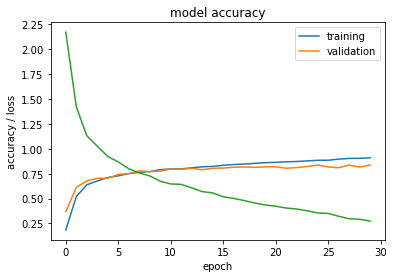

In [18]:
for layers in range(2,4):
    model = create_dense([784] * layers)
    evaluate(model)

[0.8233333, 0.8247619, 0.805, 0.8240476, 0.81238097, 0.82285714, 0.82214284, 0.8247619, 0.8138095, 0.8276191, 0.8138095, 0.80690473, 0.81857145, 0.82214284, 0.8245238, 0.8202381, 0.82547617, 0.8211905, 0.81595236, 0.83119047, 0.82738096, 0.80857146, 0.81904763, 0.82214284, 0.8202381, 0.8261905, 0.825, 0.83, 0.8233333, 0.8138095]
[0.8411376, 0.84010583, 0.84, 0.84, 0.8421429, 0.8423281, 0.8471164, 0.8446032, 0.8480423, 0.8487037, 0.8453175, 0.8465873, 0.84801584, 0.84626985, 0.84891534, 0.85227513, 0.8512963, 0.8505291, 0.84814817, 0.85232806, 0.85108465, 0.85473543, 0.8510582, 0.85444444, 0.85690475, 0.8587566, 0.8577778, 0.85724866, 0.8581217, 0.85478836]


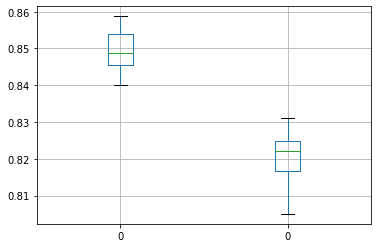

In [19]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

### Observations about number of layers

###### With 1 hidden layer the accuracy of the model was 80% which increased to ~82% with 2 hidden layers of 784 neurons and a further to 83.4% with 3 hidden layers of 784 neurons

###### But still the training and the validation ranges are varying suggesting a case for overfitting

###### The validation curve has comparatively smoothened vis a vis neural network with 1 hidden layer

# Altering the  number of neurons 

#### => With 3 hidden layers and 256 neurons in each layer

In [36]:

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(1024,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_29 (None, 1024) ==> (None, 256)
dense_30 (None, 256) ==> (None, 256)
dense_31 (None, 256) ==> (None, 256)
dense_32 (None, 256) ==> (None, 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
Total params: 396,554
Trainable params: 396,554
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.81266665


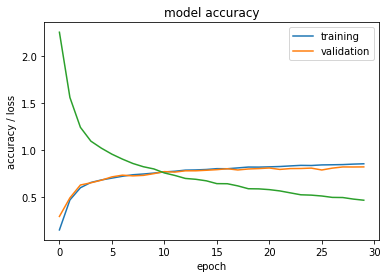

In [37]:
batch_size = 256
epochs = 30

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

####  => With 3 hidden layers and 512 neurons in each layer

In [38]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_33 (None, 1024) ==> (None, 512)
dense_34 (None, 512) ==> (None, 512)
dense_35 (None, 512) ==> (None, 512)
dense_36 (None, 512) ==> (None, 10)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.8296111


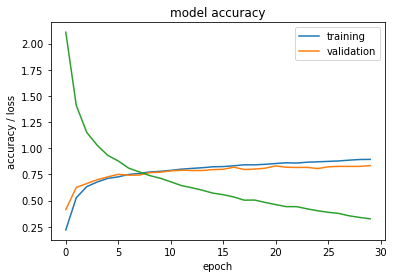

In [39]:
batch_size = 256
epochs = 30

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.41261905, 0.625, 0.66261905, 0.69857144, 0.72619045, 0.75, 0.74190474, 0.74261904, 0.7664286, 0.7709524, 0.78261906, 0.7895238, 0.7866667, 0.7864286, 0.7952381, 0.79833335, 0.8183333, 0.79642856, 0.8002381, 0.8088095, 0.83047616, 0.81785715, 0.8157143, 0.81666666, 0.805, 0.82214284, 0.8259524, 0.8259524, 0.8259524, 0.8338095]
[0.21902117, 0.52682537, 0.6328307, 0.67698413, 0.7113227, 0.7261111, 0.74915344, 0.75857145, 0.7724074, 0.77873015, 0.7880688, 0.799418, 0.8066667, 0.8130952, 0.82214284, 0.82439154, 0.8315873, 0.8410582, 0.8407672, 0.8460053, 0.8535714, 0.8603968, 0.8580159, 0.8660053, 0.8698413, 0.8737037, 0.8779365, 0.88558203, 0.89174604, 0.89301586]


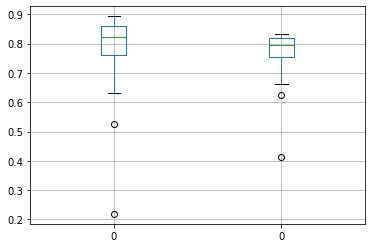

In [40]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

# With 256 and 512 neurons and 3 hidden layers

#### 1. with 256 neurons in each layer, the val accuracy is 81% approx and with 512 neurons in each layer, the val accuracy is coming very close to 83% which is comparable to the model wit 3 hidden layers of 784 neurons giving 83.4% val accuracy

#### 2. The degree of overfit (between training and validation) is also reduced as is evident from box plot

#### 3. 512 neurons with 3 hidden layers is giving the best performance so far

# Impact of batch size

In [68]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_77 (None, 1024) ==> (None, 512)
dense_78 (None, 512) ==> (None, 512)
dense_79 (None, 512) ==> (None, 512)
dense_80 (None, 512) ==> (None, 10)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 61us/sample - loss: 2.4776 - accuracy: 0.0985 - val_loss: 2.3140 - val_accuracy: 0.1007
Epoch 2/30
42000/42000 [==============================] - 2s 55us/sample - loss: 2.3113 - accuracy: 0.1029 - val_loss: 2.3064 - val_accuracy: 0.1006
Epoch 3/30
42000/42000 [==============================] - 2s 59us/sample - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.2982 - val_accuracy: 0.1133
Epoch 4/30
42000/42000 [==============================] - 2s 59us/sample - loss: 2.2957 - accuracy: 0.1296 - val_loss: 2.2945 - val_accuracy: 0.1512
Epoch 5/30
42000/42000 [==============================] - 2s 58us/sample - loss: 2.2911 - accuracy: 0.1331 - val_loss: 2.2830 - val_accuracy: 0.1441
Epoch 6/30
42000/42000 [==============================] - 2s 58us/sample - loss: 2.2776 - accuracy: 0.1494 - val_loss: 2.2629 - val_accuracy: 0.2161
Epoch 7/30
42000/42000 [==============================] 

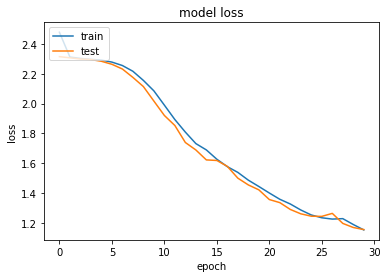

In [69]:
batch_size = 10000   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

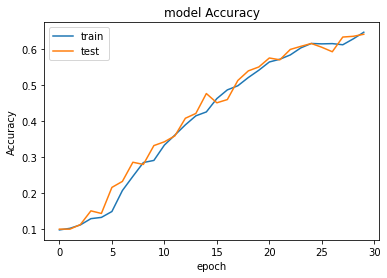

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_65 (None, 1024) ==> (None, 512)
dense_66 (None, 512) ==> (None, 512)
dense_67 (None, 512) ==> (None, 512)
dense_68 (None, 512) ==> (None, 10)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [=============

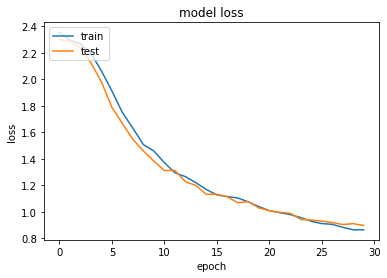

In [60]:
# Trying batch size of 5000

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size =5000   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

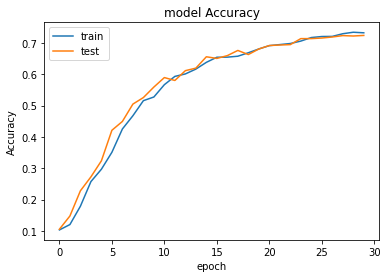

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

dense_69 (None, 1024) ==> (None, 512)
dense_70 (None, 512) ==> (None, 512)
dense_71 (None, 512) ==> (None, 512)
dense_72 (None, 512) ==> (None, 10)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_72 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [=============

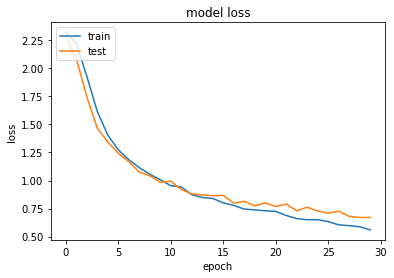

In [62]:
# Trying batch size of 2000


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 2000   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

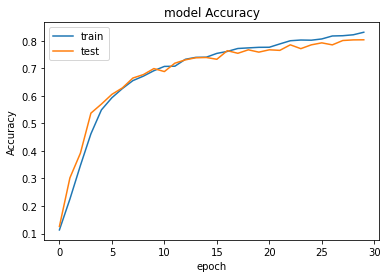

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_73 (None, 1024) ==> (None, 512)
dense_74 (None, 512) ==> (None, 512)
dense_75 (None, 512) ==> (None, 512)
dense_76 (None, 512) ==> (None, 10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_76 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [=============

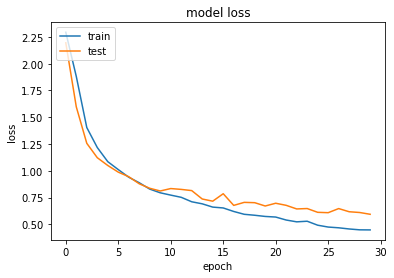

In [64]:
# Trying batch size of 1000

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 1000   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

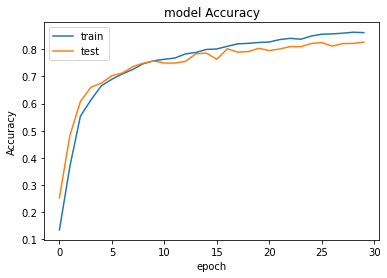

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_81 (None, 1024) ==> (None, 512)
dense_82 (None, 512) ==> (None, 512)
dense_83 (None, 512) ==> (None, 512)
dense_84 (None, 512) ==> (None, 10)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_82 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_84 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [=============

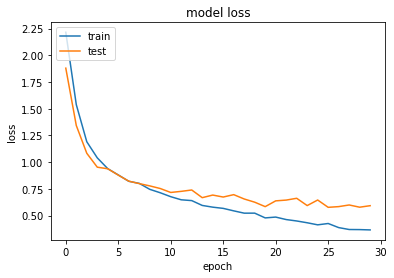

In [71]:
# Trying batch size of 500

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 500   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

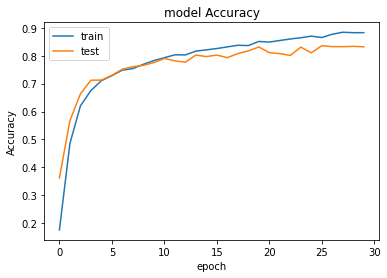

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_85 (None, 1024) ==> (None, 512)
dense_86 (None, 512) ==> (None, 512)
dense_87 (None, 512) ==> (None, 512)
dense_88 (None, 512) ==> (None, 10)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_86 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_88 (Dense)             (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [=============

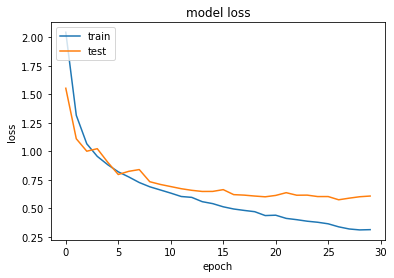

In [73]:
# Trying batch size of 250

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 250   
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

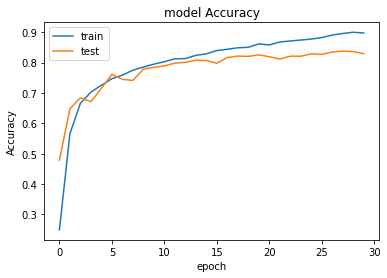

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Observations on batch size

    1. With a batch size of 250 the model generates 82.9% test accuracy and with a batch size of 1000, the test accuracy is 82.6%.
    2. Batch size in excess of 1000 brings the model accuracy significantly down
    3. So we move on with a batch size of 1000 over 30 epochs with 3 hidden layers with 512 neurons each

# Changing the Epochs 

dense_101 (None, 1024) ==> (None, 512)
dense_102 (None, 512) ==> (None, 512)
dense_103 (None, 512) ==> (None, 512)
dense_104 (None, 512) ==> (None, 10)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_102 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_104 (Dense)            (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/40
42000/42000 [=========

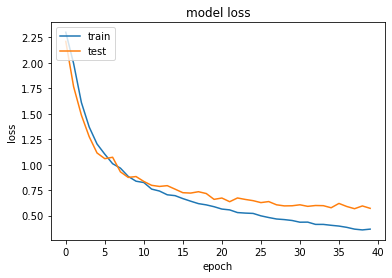

In [81]:
# Trying 40 epochs

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 1000   
epochs = 40
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

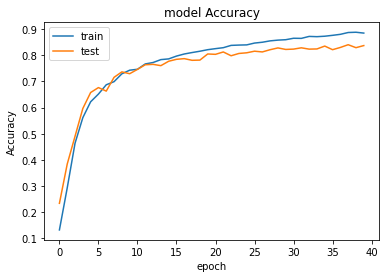

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

dense_105 (None, 1024) ==> (None, 512)
dense_106 (None, 512) ==> (None, 512)
dense_107 (None, 512) ==> (None, 512)
dense_108 (None, 512) ==> (None, 10)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_106 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_107 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_108 (Dense)            (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [=========

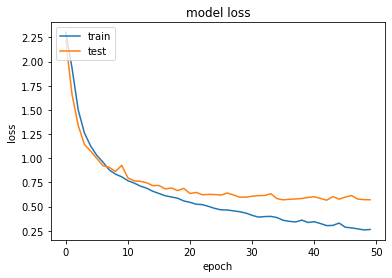

In [83]:
# Trying 50 epochs

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 1000   
epochs = 50
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

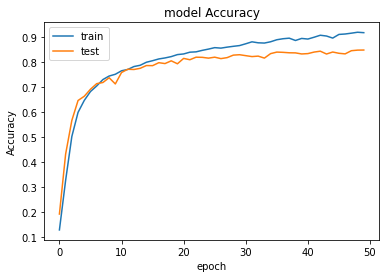

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

dense_109 (None, 1024) ==> (None, 512)
dense_110 (None, 512) ==> (None, 512)
dense_111 (None, 512) ==> (None, 512)
dense_112 (None, 512) ==> (None, 10)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_110 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_111 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_112 (Dense)            (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/65
42000/42000 [=========

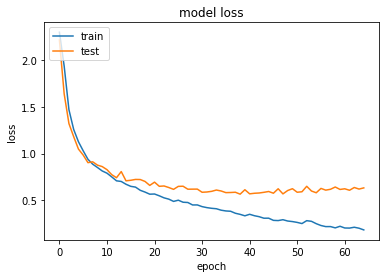

In [85]:
# Trying 65 epochs

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_size = 1000   
epochs = 65
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Observations on Epochs

#### 1. With 30 epochs, the test accuracy was 82.6%, with 40 epochs the test accuracy went up to 83.7% and with 50 epochs, the test accuracy was 85% (rounded)

#### 2. So we are moving ahead with 50 epochs

# Overall observation on layers, number of neurons, batch size and epoch

- So far we have built a dense neural network with 3 hidden layers with 512 neurons in each layer with a batch size of 1000 and number of epochs, 50


- While checking if an increased number of epochs improve the validation accuracy, we found that even with 65 epochs the test accuracy was 84.6% which suggests, the loss optimizer might be stuck in a local minima. We can check if any other optimizer or any other activation function improves the model.

# Applying batch normalization

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)             

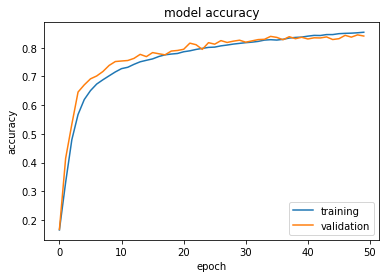


Test loss: 0.553
Test accuracy: 0.839


In [95]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1024,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2) )  
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2) )
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2) )
    model.add(Dense(num_classes, activation='softmax'))  

    return model


def run_model(model):
    batch_size = 1000    
    epochs = 50
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=0.0001)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

model = create_model()
run_model(model)

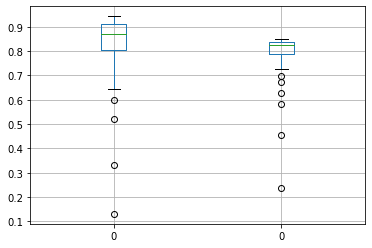

In [96]:
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

#### By implementing Batch Normalization, drop out and learning rate we have been able to stabalize the test accuracy though there is still room for improvement by checking differnt optimizers and Weight  Initialization

# Confusion Matrix and classification report

In [103]:
#Getting the predicted values using the model from the second iteration
y_predict = model.predict(X_test)

In [104]:
#Converting predicted values from 10D to 1D
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

In [105]:
#Converting test values from 10D to 1D
y_test_norm = []
for val in y_test:
    y_test_norm.append(np.argmax(val))

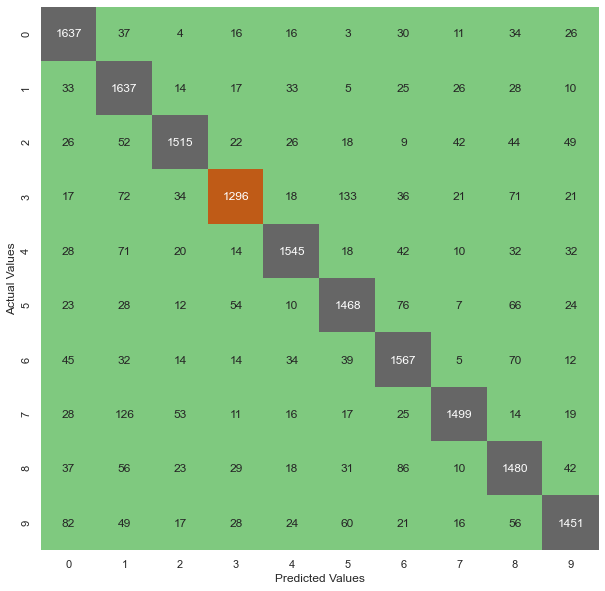

In [126]:
#Printing the confusion matrix
from sklearn import metrics
import seaborn as sns
plt.figure(figsize = (10,10)); sns.set(font_scale=1.0)
sns.heatmap(metrics.confusion_matrix(y_test_norm,y_pred), annot = True, fmt='d', cbar = False, cmap = 'Accent')
plt.xlabel('Predicted Values'); plt.ylabel('Actual Values')
plt.show()

In [127]:
#Printing the classification report
print(metrics.classification_report(y_test_norm,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1814
           1       0.76      0.90      0.82      1828
           2       0.89      0.84      0.86      1803
           3       0.86      0.75      0.80      1719
           4       0.89      0.85      0.87      1812
           5       0.82      0.83      0.82      1768
           6       0.82      0.86      0.84      1832
           7       0.91      0.83      0.87      1808
           8       0.78      0.82      0.80      1812
           9       0.86      0.80      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



# Conclusion

- The final accuracy that is achieved by the model is 84%

- Quite a few hyperparameters were tuned but there is scope to work around other hyperparameters like optimizers, weights initialization etc

- The average recall and precision of the model is 84% and from the confusion matrix it is understood that the model has some difficulty predicting the value 3

- The overall training accuracy is ~91% while the test accuracy is 84% with a delta of ~7% which can be somewhat considered as an acceptable difference and hence we can conclude that the model is not overfit
